In [326]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.size'] = 14
import time, copy,os
from numpy import pi, sin, cos, tan
import control
from numpy.fft import fft

In [327]:
import os

In [328]:
import pylab_util as PU

In [329]:
import serial

In [330]:
import serial_utils

In [331]:
import importlib

In [332]:
importlib.reload(serial_utils)

<module 'serial_utils' from '/home/ryanwkrauss/git/research/serial_utils.py'>

In [333]:
import re

In [334]:
p = re.compile("^[0-9.]+,.*")

In [335]:
def data_to_float_array(data):
    mylist = data.split('\n')

    for i, rowstr in enumerate(mylist):
        if p.search(rowstr) is not None:
            #this is the start row
            start_ind = i
            break
                
    # search backwards for '#end'
    N = len(mylist)
    for i in range(1,N):
        ind = N-i
        rowstr = mylist[ind]
        if p.search(rowstr) is not None:
            end_ind = ind
            break
    
    clean_list = mylist[start_ind:end_ind]
    clean_2 = list(filter(None,clean_list))
    nested_list = [row.split(',') for row in clean_2]
    str_array = np.array(nested_list)
    float_array = str_array.astype(float)
    return float_array

In [336]:
pwd

'/home/ryanwkrauss/sabbatical_github_work/cart_pendulum/arduino_only'

In [337]:
ls /dev/tty*

/dev/tty  /dev/ttyACM1


## Get the portname

In [338]:
for i in range(10):
    portname = "/dev/ttyACM%i" % i
    if os.path.exists(portname):
        break
print("portname: %s" % portname)

portname: /dev/ttyACM1


In [339]:
ser = serial_utils.serial_test(portname)

In [340]:
ser.open()

In [341]:
ser.print_all()

Cart Pendulum Vib Suppress 1
using rtblockdiagram library
enter any character to start a test



In [350]:
ser.flush()

In [351]:
ser.write_char('s')

In [352]:
data = ser.get_data()

In [353]:
data2 = ser.get_data()

In [354]:
data += data2

In [355]:
print(data)

t0 =49946040
3001.85,0,0,0,0,198
1.83,1,-255,0,0,200
3.34,2,-255,0,0,202
4.96,3,-255,0,0,205
6.97,4,-255,0,0,208
8.96,5,-255,0,0,211
10.96,6,-255,0,0,214
12.96,7,-255,0,0,216
14.96,8,-255,0,0,219
16.96,9,-255,0,0,222
18.96,10,-255,0,0,225
20.96,11,-255,0,0,227
22.96,12,-255,0,0,230
24.96,13,-255,0,0,233
26.96,14,-255,0,0,235
28.96,15,-255,0,0,237
30.96,16,-255,0,0,240
32.96,17,-255,0,0,242
34.96,18,-255,0,0,244
36.96,19,-255,0,0,247
38.96,20,-255,0,0,249
40.96,21,-255,0,0,251
42.96,22,-255,0,0,253
44.96,23,-255,0,0,255
46.96,24,-255,0,0,257
48.96,25,-255,0,0,259
50.96,26,-255,0,0,261
52.96,27,-255,0,0,262
54.96,28,-255,0,0,264
56.96,29,-255,0,0,266
58.97,30,-255,0,0,267
60.96,31,-255,0,0,269
62.96,32,-255,0,0,270
64.96,33,-255,0,0,272
66.96,34,-255,0,0,273
68.96,35,-255,0,0,274
70.96,36,-255,0,0,276
72.96,37,-255,0,0,277
74.96,38,-255,0,0,278
76.96,39,-255,0,0,279
78.96,40,-255,0,0,280
80.96,41,-255,0,0,281
82.96,42,-255,0,0,282
84.96,43,-255,0,0,283
86.96,44,-255,0,0,283
88.96,45,-255

In [356]:
float_array = data_to_float_array(data)

In [357]:
float_array[0:20,:]

array([[ 3.00185e+03,  0.00000e+00,  0.00000e+00,  0.00000e+00,
         0.00000e+00,  1.98000e+02],
       [ 1.83000e+00,  1.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.00000e+02],
       [ 3.34000e+00,  2.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.02000e+02],
       [ 4.96000e+00,  3.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.05000e+02],
       [ 6.97000e+00,  4.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.08000e+02],
       [ 8.96000e+00,  5.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.11000e+02],
       [ 1.09600e+01,  6.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.14000e+02],
       [ 1.29600e+01,  7.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.16000e+02],
       [ 1.49600e+01,  8.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.19000e+02],
       [ 1.69600e+01,  9.00000e+00, -2.55000e+02,  0.00000e+00,
         0.00000e+00,  2.22

In [358]:
lc = float_array[:,1]

In [359]:
v_sat = float_array[:,2]

In [360]:
vib_on = float_array[:,3]

In [361]:
v_sent = float_array[:,4]

In [362]:
enc = float_array[0:,-1]

In [363]:
t = float_array[:,0]

In [364]:
if t[0] > 500:
    t[0] = 0

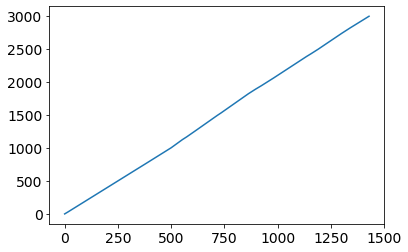

In [365]:
plt.figure()
plt.plot(t)

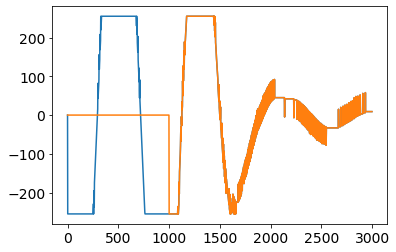

In [366]:
plt.plot(t,v_sat,t,v_sent)

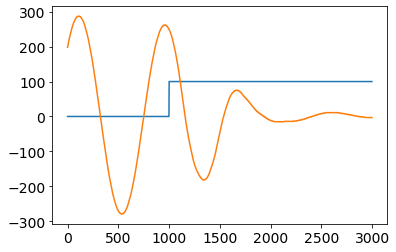

In [367]:
plt.plot(t,vib_on*100, t, enc)

In [368]:
dt_array = t[1:]-t[0:-1]

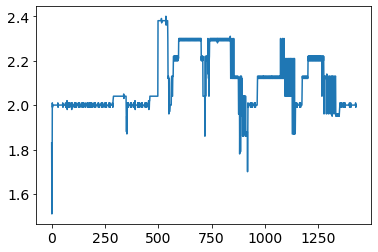

In [369]:
plt.figure()
plt.plot(dt_array)

In [159]:
v_in = float_array[:,-2]
v_out = float_array[:,-1]

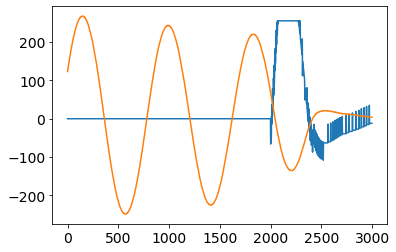

In [160]:
plt.figure()
plt.plot(t, v_in, t, v_out)
#plt.ylim([-5,260])
#plt.xlim([0,2000])
#plt.legend(['ax','ay','az'])

In [127]:
ser.close()

In [128]:
data_out = float_array

In [129]:
data_out.shape

(1500, 3)